<a href="https://colab.research.google.com/github/TurkuNLP/pytorch-registerlabeling/blob/main/pytorch_hiddenstates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip3 install transformers

In [ ]:
! wget http://dl.turkunlp.org/register-labeling-model/finbert-base-fin-0.00002-MTv2.pt

In [ ]:
! git clone https://github.com/TurkuNLP/FinCORE_full.git
%cd FinCORE_full
! ls

In [ ]:
import transformers
import sys
import numpy as np
import torch
tokenizer = transformers.AutoTokenizer.from_pretrained("TurkuNLP/bert-base-finnish-cased-v1")
model = torch.load("/content/finbert-base-fin-0.00002-MTv2.pt", map_location=torch.device('cpu'))

In [ ]:
! head -100 train.tsv

In [77]:
f = open("train.tsv", "r")
labels_total = []
embeddings = []
counter = 0
to_take = ["NE", "SR", "RV", "PB","LY"]
for line in f:
  line=line.split("\t")
  labels=line[0]
  text=line[1]
  ls=labels.split(" ")
  if len(list(set(to_take) & set(ls))) == 0:
    continue
  else:
    counter+=1
    if counter > 100:
      break
    else:
            labels_total.append(labels)
            inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
          #  print(inputs)
            #input_enc = tokenizer(text, truncation=True, max_length=512)
            #print(input_enc)
            outputs = model(**inputs, output_hidden_states=True)
            last_hidden_states = outputs.hidden_states[-1]
            print(last_hidden_states.shape)
         #   print(last_hidden_states)
            last_layer = last_hidden_states[0]
            print("last layer shape", last_layer.shape)
            #print(last_layer)
            embeddings.append(last_layer[0,:].detach().numpy()) # take the index 0 so CLS
            print("CLS shape")
            #print(last_layer[0,:].shape)
print("Total number of embeddings", len(embeddings))

torch.Size([1, 512, 768])
last layer shape torch.Size([512, 768])
CLS shape
Total number of embeddings 1


In [18]:
def write(list,name):
  fout = open(name, "w")
  for line in list:
    new = [str(a) for a in line]
    fout.write(" ".join(new))
    fout.write("\n")
  fout.close()

def write_l(list,name):
  fout = open(name, "w")
  for line in list:
    fout.write(line)
    fout.write("\n")
  fout.close()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
write(embeddings, "/content/drive/MyDrive/WorkStuff/embeddings.txt")
write_l(labels_total, "/content/drive/MyDrive/WorkStuff/labels.txt")

In [21]:
def read(inp, name):
  inp = open(inp, "r")
  name = []
  for line in inp:
      line2=line.strip().split(" ")
      line3 = [float(a) for a in line2]
      name.append(line3)
  return name

def read_l(inp, name):
    inp = open(inp, "r")
    name = []
    for line in inp:
      line=line.strip()
      name.append(line)
    return name

In [22]:
embeddings_new = read("/content/drive/MyDrive/WorkStuff/embeddings.txt", "embeddings_new")
labels_new = read_l("//content/drive/MyDrive/WorkStuff/labels.txt", "labels_new")
print(len(embeddings_new))
print(len(embeddings_new[0]))
print(len(labels_new))
print(len(labels_new[0]))
print(labels_new[0])

100
768
100
5
PB NA


In [23]:
labels_new2 = []
for f in labels_new:
  f=f.replace(" ", "-")
  labels_new2.append(f)

In [ ]:
! pip install umap-learn
! pip install datashader bokeh holoviews scikit-image colorcet 

In [25]:
import umap
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import pandas as pd

reducer = umap.UMAP()
reduced = reducer.fit_transform(embeddings_new) #nearest neig, lr
reduced.shape
#print(reduced)

(100, 2)

In [39]:
df = pd.DataFrame(embeddings_new)
coln = []
for x in range(0,768): 
  coln.append("Col_"+str(x))
df.columns = coln
df['Labels'] = labels_new2
df.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_759,Col_760,Col_761,Col_762,Col_763,Col_764,Col_765,Col_766,Col_767,Labels
0,1.069364,1.859664,0.867835,1.113974,1.021448,0.149794,0.797208,-0.315022,-0.487905,1.094844,...,0.797918,1.397920,-0.878199,-1.505954,0.479954,0.151767,-0.309200,-0.892775,0.789982,PB-NA
1,0.761765,2.213071,1.030492,1.279357,0.756945,0.368263,0.994574,-0.434663,-1.039588,1.325265,...,0.661670,1.079528,-1.037057,-1.224327,0.714251,0.225330,-0.250188,-0.857220,0.675162,PB-NA
2,-0.347135,0.076683,-1.653841,0.295007,-0.904214,1.186285,-0.878108,-0.524688,-1.465046,0.347324,...,1.803824,1.338474,-1.324766,-1.059445,-1.033075,1.310125,-0.509948,0.055335,0.529165,NE-NA
3,-0.164399,-0.046096,1.042209,0.141885,1.647001,-0.876021,1.242773,-0.059486,-1.044641,1.111741,...,1.508280,-0.324121,-0.648639,0.431740,0.623803,-0.291645,-0.600127,-1.402626,-1.020081,SR-NA
4,-0.030619,-0.981269,0.548622,-0.201160,1.001512,-0.144031,-1.952007,-0.469737,-0.280533,-0.188378,...,-0.127668,0.447978,-0.591188,-0.146531,0.520664,0.822608,0.246796,2.227728,2.295121,DT-IN-RV-OP


In [53]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


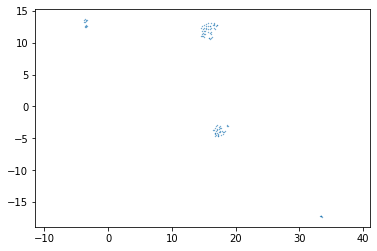

In [56]:
import seaborn as sns 

plt.scatter(
    reduced[:, 0],
    reduced[:, 1], s=0.1, alpha=0.9)#,
  #  c=[sns.color_palette()[x] for x in df["Labels"].map({"PB-NA":0, "NE-NA-IP-IG":1})]) #, 'PB-NA-RV-OP':2, 'DT-IN-RV-OP':3, 'PO-LY':4, 'SR-NA':5, 'MT-OS-RV-OP':6, 'NE-NA':7, 'RV-OP:7'})])
                                                        #{"NA-NE":0, "NA-SR":1, "OP-RV":2})])
plt.gca().set_aspect('equal', 'datalim')


In [37]:
mapper = umap.UMAP().fit(embeddings_new)

In [ ]:
print(mapper)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})


<AxesSubplot:>

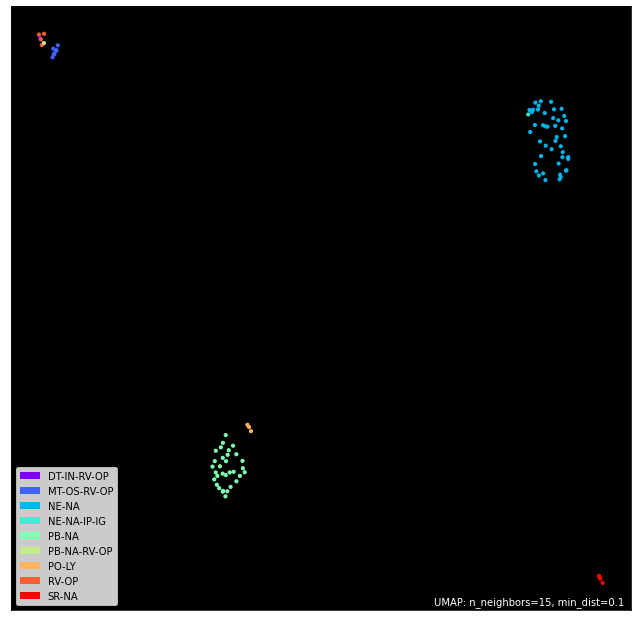

In [59]:
import umap.plot
umap.plot.points(mapper, labels=df["Labels"], theme='fire')

In [61]:
df = pd.DataFrame(reduced)
coln = []
for x in range(0,2): 
  coln.append("Col_"+str(x))
df.columns = coln
df['Labels'] = labels_new2
df.head()

,Col_0,Col_1,Labels
0,17.160259,-4.447518,PB-NA
1,18.007174,-4.349782,PB-NA
2,14.877650,12.127233,NE-NA
3,33.481899,-17.332405,SR-NA
4,-3.366522,12.541585,DT-IN-RV-OP


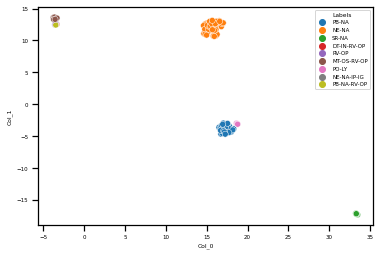

In [79]:
sns.scatterplot(data=df, x="Col_0", y="Col_1", hue="Labels")
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 0.5})

In [ ]:
vanhoja roskia

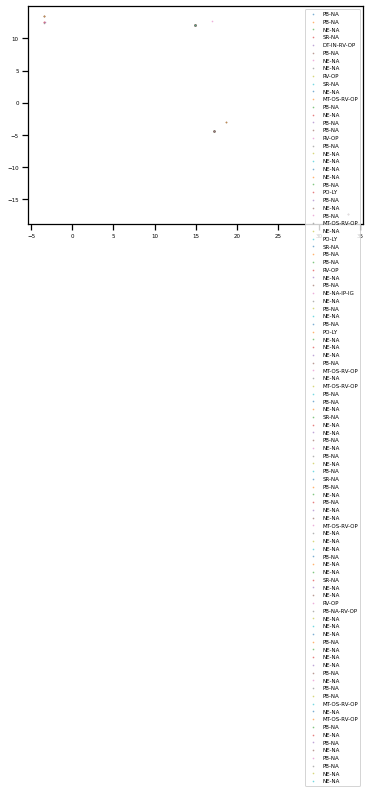

In [78]:
fig, ax = plt.subplots()
scatter_x = reduced[:,0]
scatter_y = reduced[:,1]
group = labels_new2#np.array([1,3,2,1,3])
#print(np.unique(group))
for g in labels_new2:#np.unique(group):
    #print("G", g)
    i = labels_new2.index(g)#np.where(group == g)
    #print("i", i)
    ax.scatter(scatter_x[i], scatter_y[i], alpha=0.5, label=g, s=0.5)
ax.legend()
plt.show()

ValueError: ignored

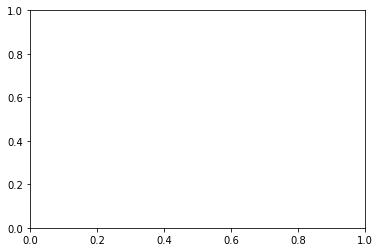

In [29]:
fig, ax = plt.subplots()
ax.scatter(reduced[:,0], reduced[:,1],  c=range(0,len(labels)), cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
#legend1 = ax.legend(range(0,len(labels))#*scatter.legend_elements(num=5),
               #     loc="upper left", title="Ranking")
#ax.add(legend1)
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
ax.legend()
plt.title('UMAP projection of the Digits dataset', fontsize=12);